In [1]:
# This is a starting point to have a data set that will be used to aid in the understanding
# of some of the drivers of housing price driving factors.  Starting with avalaible health low volume data

In [2]:
# Goal is to obtaining the USA hosptial data and map it
#https://www.ahd.com/state_statistics.html

#todo, create code to automatical screen scrap data
# get missinng data - ~ 50%
# Clean up the story and post. 


In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
import pandas as pd
import gc
%matplotlib inline

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [5]:
# Goal is to obtaining the USA hosptial data and mapping it
# https://www.ahd.com/state_statistics.html

hospitals = pd.read_csv('C:/Users/Joe/hospital_aha.csv', encoding='cp1252',low_memory=False)

# Extract the data we're interested in
lat = hospitals['LATITUDE'].values
lon = hospitals['LONGITUDE'].values


# Calualate additional data we're interested in

hospitals['Bed_usage_days_per_year'] = (hospitals['Patient_Days'] / hospitals['Staffed_Beds'])
hospitals['Avg_patients_per_bed'] = (hospitals['Total_Discharges'] /  hospitals['Staffed_Beds'])
hospitals['Avg_revenue_per_bed'] = (hospitals['Gross_Patient_Revenue($000)'] / hospitals['Staffed_Beds'])*1000
hospitals['Avg_revenue_per_patient_day'] = (hospitals['Gross_Patient_Revenue($000)'] / hospitals['Patient_Days'])*1000
hospitals['Avg_patient_stay_length_days'] = (hospitals['Patient_Days'] / hospitals['Staffed_Beds'])

# Convert NaN to zero 

hospitals['Bed_usage_days_per_year'] = hospitals['Bed_usage_days_per_year'].replace('nan', np.nan).fillna(0)
hospitals['Avg_patients_per_bed'] = hospitals['Avg_patients_per_bed'].replace('nan', np.nan).fillna(0)
hospitals['Avg_revenue_per_bed'] = hospitals['Avg_revenue_per_bed'].replace('nan', np.nan).fillna(0)
hospitals['Avg_revenue_per_patient_day'] = hospitals['Avg_revenue_per_patient_day'].replace('nan', np.nan).fillna(0)
hospitals['Avg_patient_stay_length_days'] = hospitals['Avg_patient_stay_length_days'].replace('nan', np.nan).fillna(0)

a_r_p_b = hospitals['Avg_revenue_per_bed'].values 
a_p_s_l_d = hospitals['Avg_patient_stay_length_days'].values 

# To get better scaling of the length of stay infomation scatter dots 
min = hospitals.loc[hospitals['Avg_patient_stay_length_days'] > 0, 'Avg_patient_stay_length_days'].min()
max = hospitals['Avg_patient_stay_length_days'].max()

hospitals['scaled'] = np.where(hospitals['Avg_patient_stay_length_days']==0,
                        0,
                        10*((hospitals['Avg_patient_stay_length_days'] - min)/ (max-min)))
lscaled = hospitals['scaled'].values
    
display(hospitals.tail())

# Writting the new date in the "old file" for graphing
hospitals.to_csv("C:/Users/Joe/hospital_aha_data2.csv", index=False)


,Ref,Hospital_Name,City,Staffed_Beds,Total_Discharges,Patient_Days,Gross_Patient_Revenue($000),State,LATITUDE,LONGITUDE,ada_hypertext_link,Bed_usage_days_per_year,Avg_patients_per_bed,Avg_revenue_per_bed,Avg_revenue_per_patient_day,Avg_patient_stay_length_days,scaled
3839,3840,Saint John's Medical Center,Jackson,108,1914,5491,161097,WY - Wyoming,0.000000,0.000000,https://www.ahd.com/free_profile/530015/Saint_...,50.842593,17.722222,1.491639e+06,29338.371881,50.842593,1.156408
3840,3841,Sheridan Memorial Hospital,Sheridan,71,2378,7440,173950,WY - Wyoming,48.779184,-104.563277,https://www.ahd.com/free_profile/530006/Sherid...,104.788732,33.492958,2.450000e+06,23380.376344,104.788732,2.383744
3841,3842,Sheridan VA Medical Center,Sheridan,0,0,0,0,WY - Wyoming,0.000000,0.000000,https://www.ahd.com/free_profile/53005F/Sherid...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
3842,3843,Summit Medical Center,Casper,0,0,0,0,WY - Wyoming,0.000000,0.000000,https://www.ahd.com/free_profile/530034/Summit...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
3843,3844,Wyoming Medical Center,Casper,163,8608,33919,494146,WY - Wyoming,42.848077,-106.308823,https://www.ahd.com/free_profile/530012/Wyomin...,208.092025,52.809816,3.031571e+06,14568.412984,208.092025,4.734011


3322

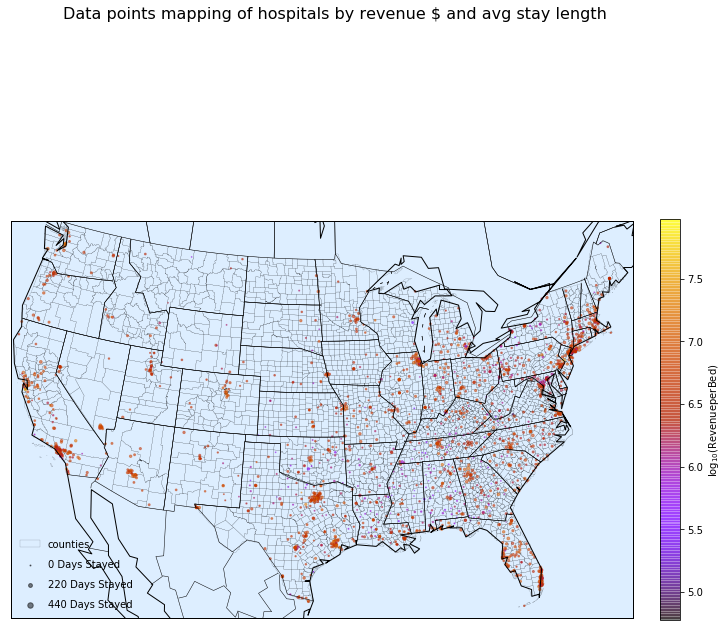

In [19]:
np.seterr(divide = 'ignore')
#np.seterr(divide = 'warn') 

# 1. Draw the map background
fig = plt.figure(figsize= (12, 12))
m = Basemap(projection='lcc', resolution='c', 
            lat_0=38.2, lon_0=-96.5,
            width=4.7E6, height=3E6)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawcounties()
m.etopo(scale=0.5, alpha=0.5)
m.drawmapboundary(fill_color="#DDEEFF")

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(a_r_p_b), s=(lscaled),
          cmap='gnuplot', alpha=0.5)
          # lscale was used to may days stayed a linear function vs a log scale

# 3. create colorbar and legend
plt.colorbar(fraction=0.03, pad=0.04, 
             label=r'$\log_{10}({\rm Revenue  per Bed})$') 
             # this fraction detail is seemed to be the best way to get the colorbarto match the geo graph size

# 4. make legend with dummy points
a=(1,15,30) #1, 15, 30 is the dot size
min_i = int(round(min))
max_i = int(round(max))
b=(min_i, int(round(min_i+max_i)/2), max_i) # unscaling days stayed

for a, b  in zip(a,b):
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(b) + ' Days Stayed')
plt.legend(scatterpoints=1
           , frameon=False,
           labelspacing=1, loc='lower left');

#data_size = ('Avg_revenue_per_bed' !=0).sum()
data_size = hospitals['Gross_Patient_Revenue($000)'].astype(bool).sum(axis=0)

# 5. title
fig.suptitle('Data points mapping of hospitals by revenue $ and avg stay length', fontsize=16)
display (data_size)


In [21]:
# This is the list of the top 20 factors that have the highest correlation coefficients 
hospitals.corr().abs().unstack().sort_values(ascending = False).drop_duplicates().head(20)

scaled                       scaled                          1.000000
Bed_usage_days_per_year      scaled                          1.000000
Total_Discharges             Patient_Days                    0.981417
LONGITUDE                    LATITUDE                        0.950253
Patient_Days                 Staffed_Beds                    0.949439
Staffed_Beds                 Total_Discharges                0.943138
Gross_Patient_Revenue($000)  Patient_Days                    0.880154
Total_Discharges             Gross_Patient_Revenue($000)     0.862806
Avg_patients_per_bed         Avg_patient_stay_length_days    0.849147
scaled                       Avg_patients_per_bed            0.849142
Staffed_Beds                 Gross_Patient_Revenue($000)     0.834380
Total_Discharges             scaled                          0.652847
                             Bed_usage_days_per_year         0.652843
Patient_Days                 scaled                          0.621634
Bed_usage_days_per_y

In [ ]:
# This is the list of the top 20 factors that have the highest correlation coefficients 